0.42364893019360184 1.0986122886681098 -0.4236489301936017


-1.0

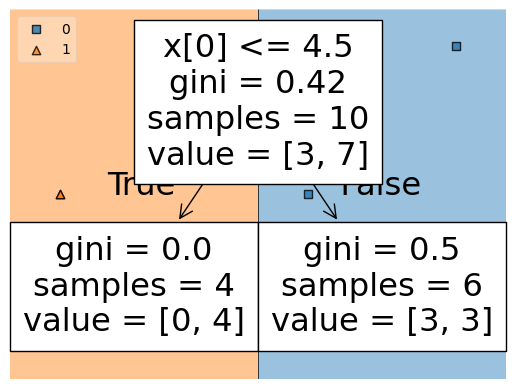

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
df = pd.DataFrame()
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])
df['weights']=1/df.shape[0]
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=1)
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values
# Step 2 - Train 1st Model

dt1.fit(x,y)
from sklearn.tree import plot_tree

plot_decision_regions (x,y,clf=dt1, legend=2)
df['y_pred'] = dt1.predict(x)

def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

# Step - 3 Calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1
# Step -4 Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights']* np.exp(-alpha)
  else:
    return row['weights']* np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights,axis=1)
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df['normalized_weights'].sum()


df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower']=df['cumsum_upper'] - df['normalized_weights']
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]
def create_new_dataset(df):
  indices= []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper']>a and a>row['cumsum_lower']:
        indices.append(index)
  return indices

index_values = create_new_dataset(df)
index_values

second_df = df.iloc[index_values,[0,1,2,3]]
second_df
dt2 = DecisionTreeClassifier(max_depth=1)

x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt2.fit(x,y)

plot_tree(dt2)

plot_decision_regions(x, y, clf=dt2, legend=2)
second_df['y_pred'] = dt2.predict(x)
second_df
alpha2 = calculate_model_weight(0.1)

alpha2
# Step 4 - Update weights

def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df['nomalized_weights'].sum()

second_df['nomalized_weights'].sum()

second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]
alpha3 = calculate_model_weight(0.7)
alpha3

print(alpha1,alpha2,alpha3)

query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
dt2.predict(query)


alpha1*1 + alpha2*(1) + alpha3*(1)

np.sign(1.09)

query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

dt2.predict(query)



alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.sign(-0.25)